In [13]:
import os
import sys
import time
import atexit
import logging
import argparse
import omegaconf
import rasterio
from glob import glob
from pathlib import Path

import numpy as np
import cupy as cp
import pandas as pd
import xarray as xr
import rioxarray as rxr
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append("/adapt/nobackup/people/jacaraba/development/tensorflow-caney")

from tensorflow_caney.utils.data import standardize_image

In [14]:
data_regex = '/adapt/nobackup/projects/3sl/data/Tappan/*_data.tif'
data_filenames = glob(data_regex)
len(data_filenames)

272

(8, 5000, 5000)


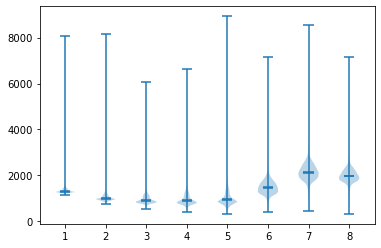

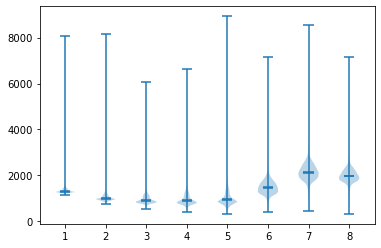

(8, 5000, 5000)


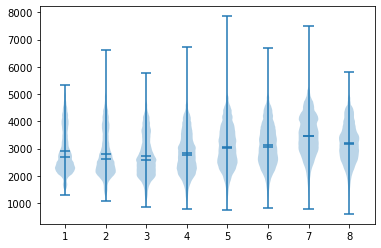

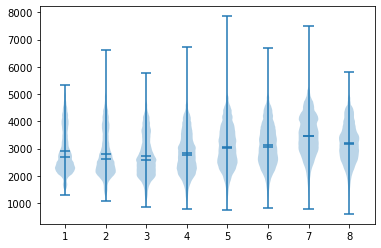

In [16]:
for filename in data_filenames[:2]:
    
    # read the imagery
    data_array = rxr.open_rasterio(filename).values
    print(data_array.shape)
    
    violin_list = []
    for channel in range(data_array.shape[0]):
        violin_list.append(data_array[channel, :, :].flatten())
    
    # plot original TOA spectral values
    fig, ax = plt.subplots()
    vp = ax.violinplot(violin_list, showmeans=True, showmedians=True, showextrema=True)
    plt.show()
    
    # plot standardized spectral values
    data_array = data_array / 10000.0
    data_array = standardize_image(
        data_array, standardization_type='local', mean=None, std=None)
    
    violin_list = []
    for channel in range(data_array.shape[0]):
        violin_list.append(data_array[channel, :, :].flatten())
    
    fig, ax = plt.subplots()
    vp = ax.violinplot(violin_list, showmeans=True, showmedians=True, showextrema=True)
    plt.show()
    
    # plot 
    

In [3]:
import numpy as np
import tensorflow as tf
from glob import glob

2022-10-07 11:40:10.494371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
filenames = glob('/lscratch/jacaraba/senegal-lcluc/crop-dataset.v6/images/*.npy')
len(filenames)

14000

In [9]:
x = np.load(filenames[0])
x.shape, x.min(), x.max()

((512, 512, 8), 0.0, 0.6724989)

In [14]:
mean = np.mean(x, axis=(0, 1))
std = np.std(x, axis=(0, 1))
minimum = np.min(x, axis=(0, 1))
maximum = np.max(x, axis=(0, 1))
print(mean)
print(std)
print(minimum)
print(maximum)

[0.07126667 0.088333   0.09917883 0.11759799 0.09962925 0.19643223
 0.2185083  0.30624256]
[0.02212582 0.02758168 0.03884094 0.057792   0.05619571 0.06465892
 0.06693356 0.09972773]
[0.02079723 0.02663755 0.00065847 0.00328812 0.00088666 0.00424957
 0.         0.        ]
[0.24783362 0.26069868 0.28248462 0.34730786 0.31165951 0.44581804
 0.49377593 0.6724989 ]


In [18]:
mean = tf.math.reduce_mean(np.expand_dims(x, 0), [0, 1, 2]).numpy()
std = tf.math.reduce_std(np.expand_dims(x, 0), [0, 1, 2]).numpy()
minimum = tf.math.reduce_min(np.expand_dims(x, 0), [0, 1, 2]).numpy()
maximum = tf.math.reduce_max(np.expand_dims(x, 0), [0, 1, 2]).numpy()
print(mean)
print(std)
print(minimum)
print(maximum)

[0.07124086 0.08833514 0.09918921 0.11759634 0.09962367 0.19643506
 0.21850587 0.3062795 ]
[0.02212773 0.02758253 0.03884087 0.05779149 0.05619153 0.06466115
 0.06693378 0.09972602]
[0.02079723 0.02663755 0.00065847 0.00328812 0.00088666 0.00424957
 0.         0.        ]
[0.24783362 0.26069868 0.28248462 0.34730786 0.31165951 0.44581804
 0.49377593 0.6724989 ]


In [19]:
%%time

new_array = []
for f in filenames:
    new_array.append(np.load(f))
new_array = np.array(new_array)

CPU times: user 38.9 s, sys: 1min 37s, total: 2min 15s
Wall time: 2min 39s


In [20]:
new_array.shape

(14000, 512, 512, 8)

In [ ]:
# create tiles for each month
# load tiles for each month
# get metrics for each month
# store in dataframe